In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
audio_path = "/content/drive/MyDrive/Actor_01/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(audio_path)

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

Text(0.5, 0, 'Time')

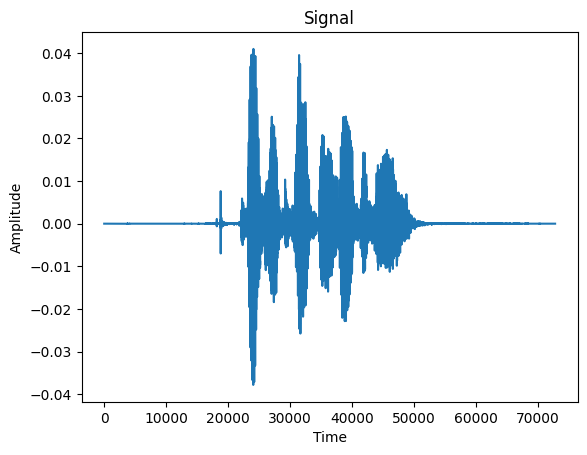

In [5]:
plt.plot(y)
plt.title("Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")

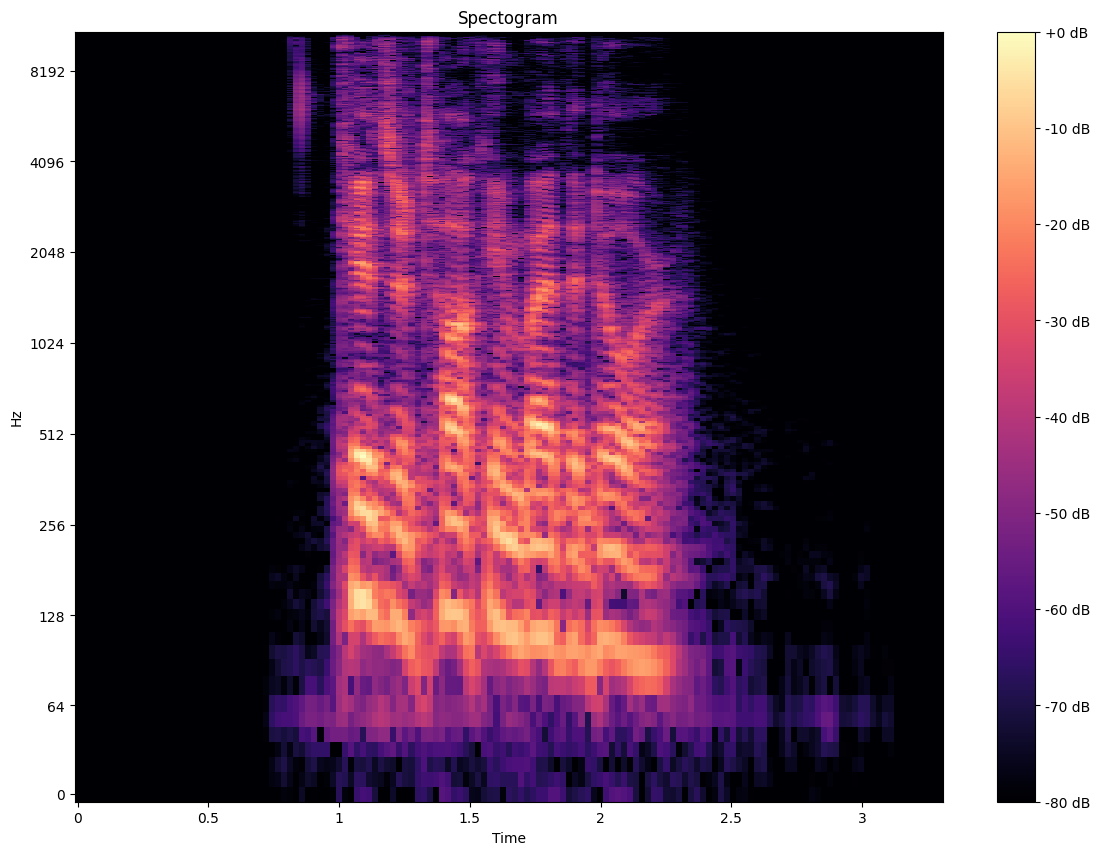

In [6]:
import numpy as np
spec = np.abs(librosa.stft(y, hop_length = 512))
spec = librosa.amplitude_to_db(spec, ref = np.max)

plt.figure(figsize=(14, 10))
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format = '%+2.0f dB');
plt.title("Spectogram");

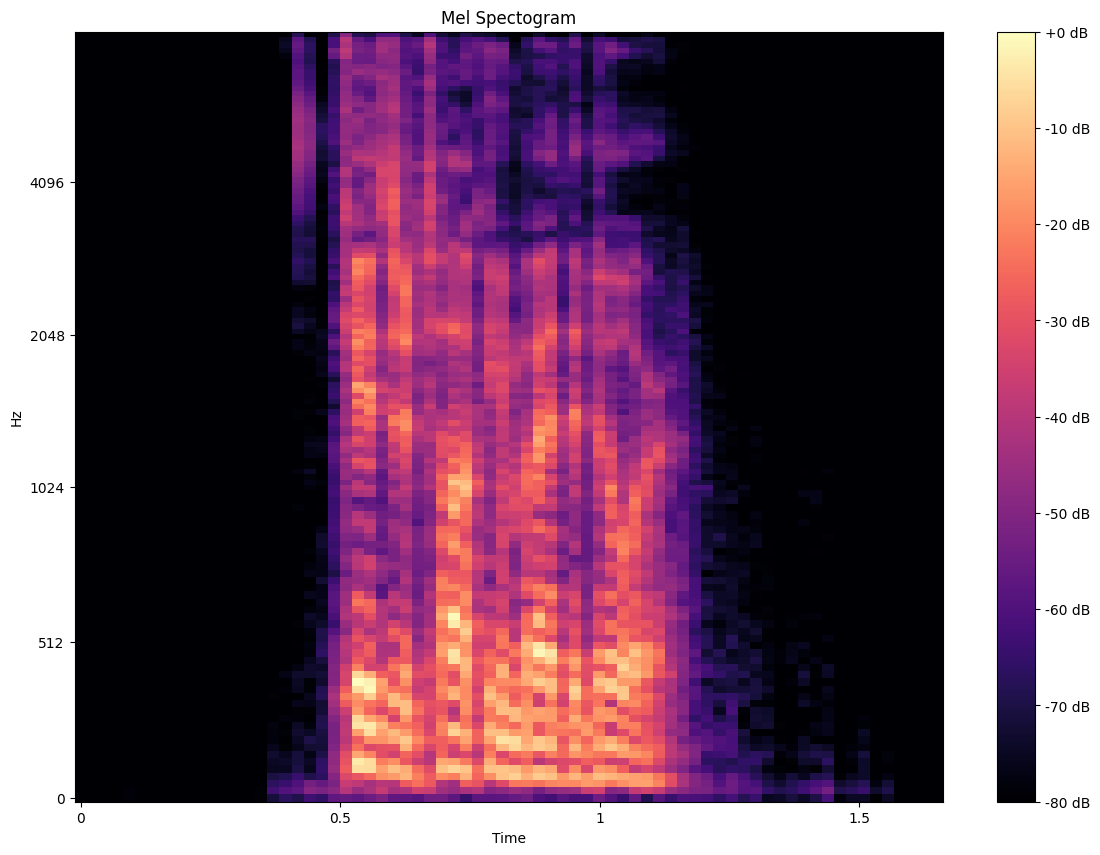

In [7]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 1024)
mel_spec = librosa.power_to_db(mel_spec, ref = np.max)

plt.figure(figsize=(14, 10))
librosa.display.specshow(mel_spec, fmax=8000, x_axis='time', y_axis='mel');
plt.colorbar(format = '%+2.0f dB');
plt.title("Mel Spectogram");

In [8]:
import numpy as np
sr = 22050     # sample rate
T = 5.0      # seconds
t = np.linspace(0, T, int(T*sr), endpoint = False)
x = 0.5 * np.sin(2*np.pi*220*t)

In [9]:
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

In [10]:
!pip install --upgrade librosa

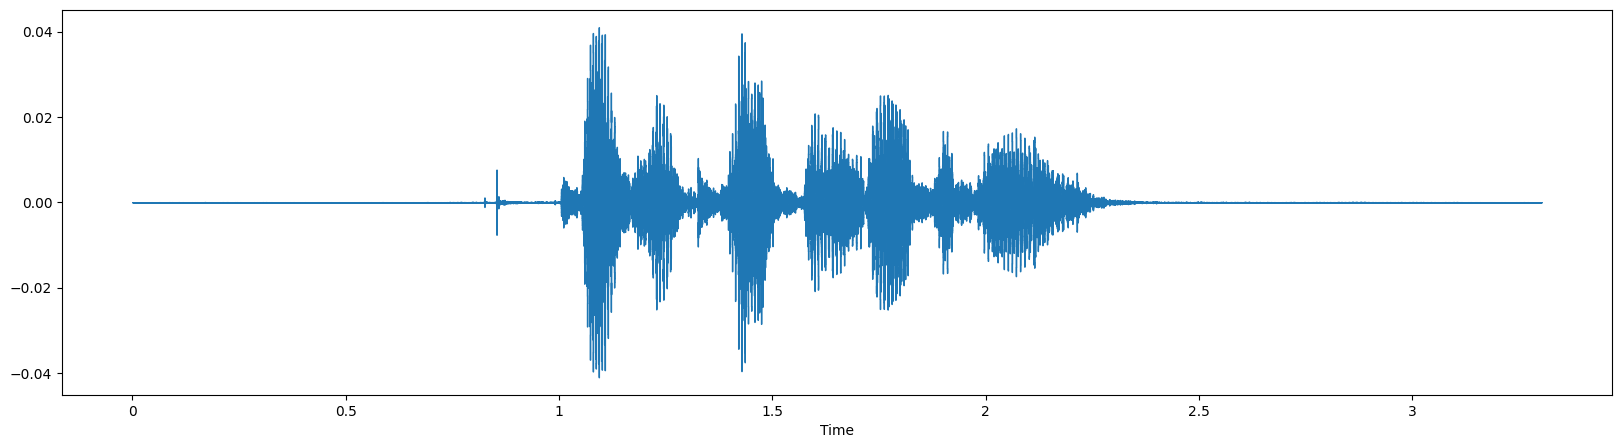

In [11]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

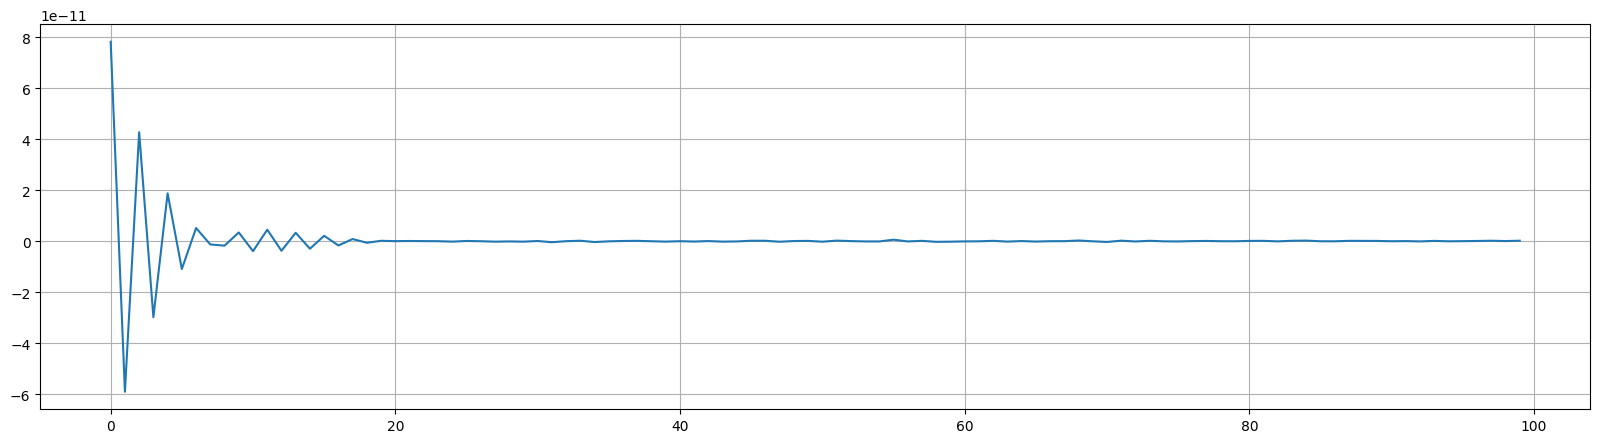

In [12]:
#zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(20,5))
plt.plot(x[n0:n1])
plt.grid()

(20, 143)


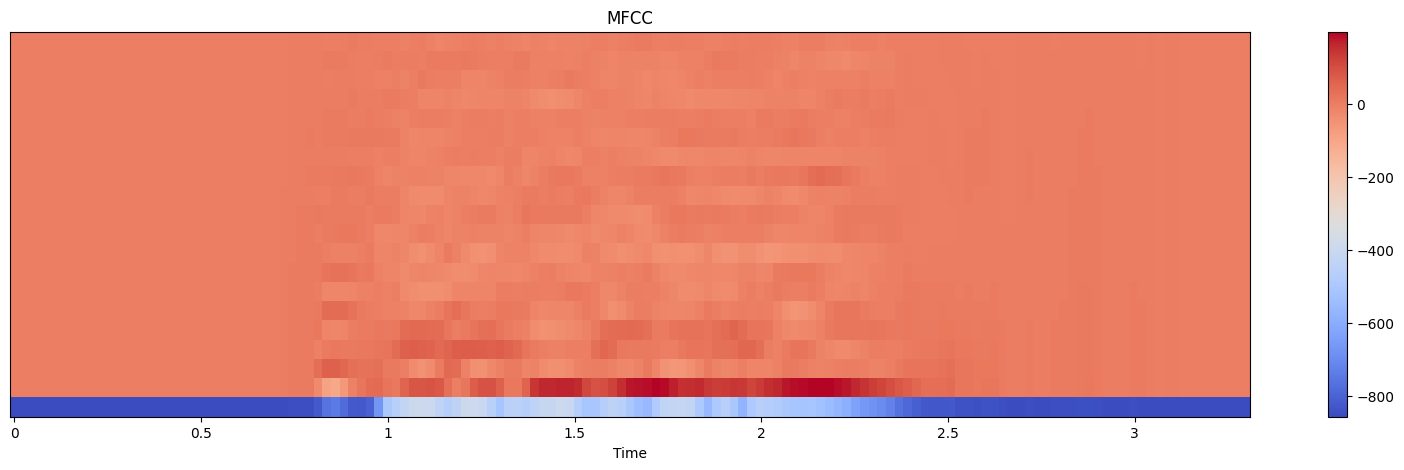

In [13]:
# MFCC
import librosa.feature
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x,sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time');
plt.colorbar();
plt.title('MFCC');